In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
from matplotlib import pyplot as plt      
import pandas as pd
from scipy import special                 
import scipy.optimize as opt    
import array
from scipy.signal import find_peaks, peak_prominences, peak_widths
def unPackRawFile(raw_path):
    """


    
    - unpacks the .raw file. Not used for the neural network.
    """
    y = np.loadtxt(raw_path, skiprows=6)
    distance = y[:,0]
    pec_vel = y[:,1]
    temp = y[:,2]
    HI_density = y[:,3]
    gas_density = y[:,4]
    gas_metallicity = y[:,5]
   
    return distance, pec_vel, temp, HI_density, gas_density, gas_metallicity

In [2]:
def calculate_gamma(temperature,density,xHI,scale):
    '''Gamma = R(T)*ne/xHI, R(T) = 4.3e-13 * (T/1e4K)^{-0.7), ne = 0.82*nb.
    '''
    omega_b = 0.0479; h = 0.6814
    mean_nb = 1.123e-5/scale**3*omega_b*h**2
    nb = np.multiply(density ,mean_nb); ne = 0.82*nb
    R_T = 4.3e-13 * (np.divide(temperature,1e4))**(-0.7)
    gamma = R_T * ne / xHI
    
    return gamma

need to graph distribution of lyman limit system optical depth verus the neutral fraction of gas

In [3]:
def lyman_identification():
    """
    function for identifying lls using neutral fraction as filter
    """
    neutral_fraction_limit = 1e-3
    lyman_limited_value = []
    neutral_fraction = []
    neutral_fraction2 = []
    gamma = []
    HI = []
    lyman_limited_value2 =[]
    gamma2= []
    gas_den = []
    for i in range(1000):
        raw_path = 'los.00' + '{0:03}'.format(i) +'.raw'
        distance, pec_vel, temp, HI_density, gas_density, gas_metallicity = unPackRawFile(raw_path)
        #changing the distance from chimp to cmeters
        distance_cm = distance *0.1452*3.086e24 /0.68
        for k in range(len(distance) -2):
            if(HI_density[k]/gas_density[k]<neutral_fraction_limit and HI_density[k+1]/gas_density[k+1]>neutral_fraction_limit):
                left_bases = k+1
                peak_fraction = HI_density[k]/gas_density[k]
                peak_HI = HI_density[k]
                peak_distance = distance[k]
                peak_gas = gas_density[k]
                if( k+1 <len(distance)):
                    while(not(HI_density[k]/gas_density[k]>neutral_fraction_limit and HI_density[k+1]/gas_density[k+1]<neutral_fraction_limit) and k <len(distance)-1):
                        right_bases = k +1
                        if(k<len(distance)-1):
                            k+=1
                        if(HI_density[k]/gas_density[k]>peak_fraction):
                            peak_fraction = HI_density[k]/gas_density[k]
                            peak_HI = HI_density[k]
                            peak_distance = distance[k]
                            peak_gas = gas_density[k]
                            peak_gamma = calculate_gamma(temp[k],gas_density[k],peak_fraction,0.1452)
                            peak_gamma2 =  calculate_gamma(temp[k],gas_density[k],peak_fraction,0.1452)
                    area_under = peak_HI *1/2*(distance_cm[right_bases]-distance_cm[left_bases])/0.937415
                    """
                    pretty large range here
                    """
                    if(area_under >= (10**15)and area_under  <= (10**22)):
                        lyman_limited_value.append(area_under)
                        neutral_fraction.append(peak_fraction)
                        HI.append(peak_HI)
                        gamma.append(peak_gamma)
                        gas_den.append(peak_gas)
                    '''if( area_under >= 10**20 and area_under <=10**22):
                        gamma2.append(peak_gamma2)
                        neutral_fraction2.append(peak_fraction)
                        lyman_limited_value2.append(area_under)'''
                        
    return lyman_limited_value,neutral_fraction,gamma,gamma2,lyman_limited_value2,neutral_fraction2,HI,gas_den
lyman_limited_value,neutral_fraction,gamma,gamma2,lyman_limited_value2,neutral_fraction2,HI,gas_density_normalized = lyman_identification()


In [4]:
sigma = 6.3e-18

In [5]:
optical_depth = np.multiply(sigma,lyman_limited_value)
optical_depth2 = np.multiply(sigma,lyman_limited_value2)

[1.65957382 3.83205357]


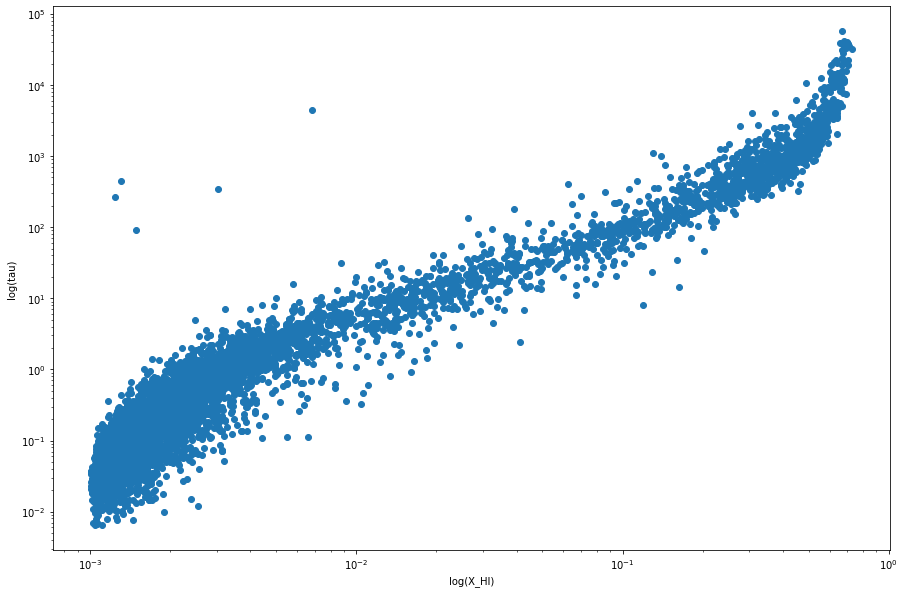

In [6]:
"""
logged tau vs neutral fraction
"""
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.set_xlabel("log(X_HI)")
ax.set_ylabel("log(tau)")
fit = np.polyfit(np.log10(neutral_fraction),np.log10(optical_depth),1)
print(fit)
ax.set_xscale("log")
ax.set_yscale("log")
ax.scatter(neutral_fraction,optical_depth)


In [ ]:
import pandas as pd
from plotnine import*

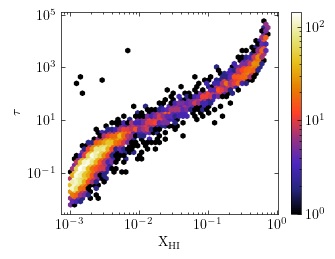

In [77]:
import matplotlib.pyplot as plt
with plt.style.context('science','notebook'):
    plt.xlabel("$\mathrm{X_{HI}}$",fontsize = 10)
    plt.ylabel(r"$\tau$",fontsize = 10)
    plt.xscale("log")
    plt.yscale("log")
    plt.hexbin(neutral_fraction,optical_depth,gridsize=50,bins='log',mincnt=1,xscale="log",yscale="log",cmap ='CMRmap')
    plt.colorbar()

    plt.savefig('f4_non_uniform_80.pdf') 

In [17]:
data = pd.DataFrame()
data['neutral_fraction'] = neutral_fraction
data['optical_depth'] = optical_depth

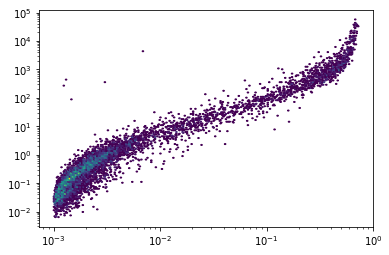

ModuleNotFoundError: No module named 'geom_hex'

In [29]:
ggplot(data,aes(x= eutral_fraction,optical_depth) + geom_point(alpha = 0.3))

NameError: name 'geom_hex' is not defined

In [8]:
max(neutral_fraction)

0.7261014792428822

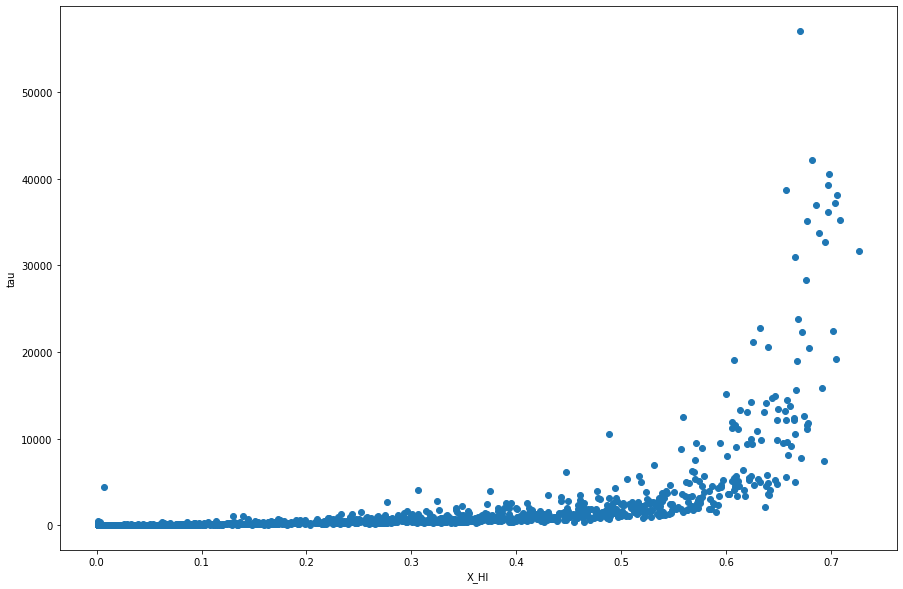

In [9]:
"""
not logged
"""
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.set_xlabel("X_HI")
ax.set_ylabel("tau")
ax.scatter(neutral_fraction,optical_depth)

In [10]:
def average_gamma(gamma):
    """
    average gamma used to calculate
    """
    average = 0
    for i in (gamma):
        average += i
    average = average/(len(gamma))
    return average
average = average_gamma(gamma+gamma2)
average

2.2750226853079752e-17

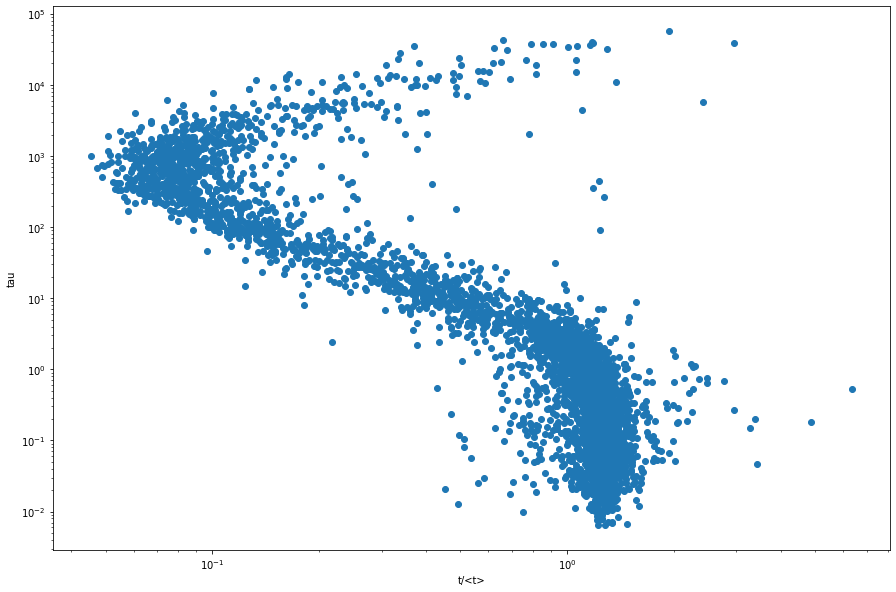

In [11]:
"""
logged optical depth vs gamma
"""
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.set_xlabel("t/<t>")
ax.set_ylabel("tau")
ax.set_xscale("log")
ax.set_yscale("log")
ax.scatter(abs(gamma/average),optical_depth)

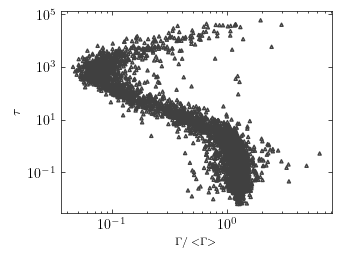

In [12]:
import matplotlib.pyplot as plt
x_along = np.linspace(min(gamma/average)-1,max(gamma/average)+5,2)
with plt.style.context('science','notebook'):
    plt.xlabel(r"$\Gamma$""$/<$"r"$\Gamma$""$>$",fontsize = 8)
    plt.ylabel(r"$\tau$",fontsize = 10)
    plt.xscale("log")
    plt.yscale("log")
    plt.scatter(abs(gamma/average),optical_depth,s = 5,marker = "^",facecolors='none', edgecolors="0.25")
    plt.savefig('f7_non_uniform_80.pdf') 

(0.0, 0.5)

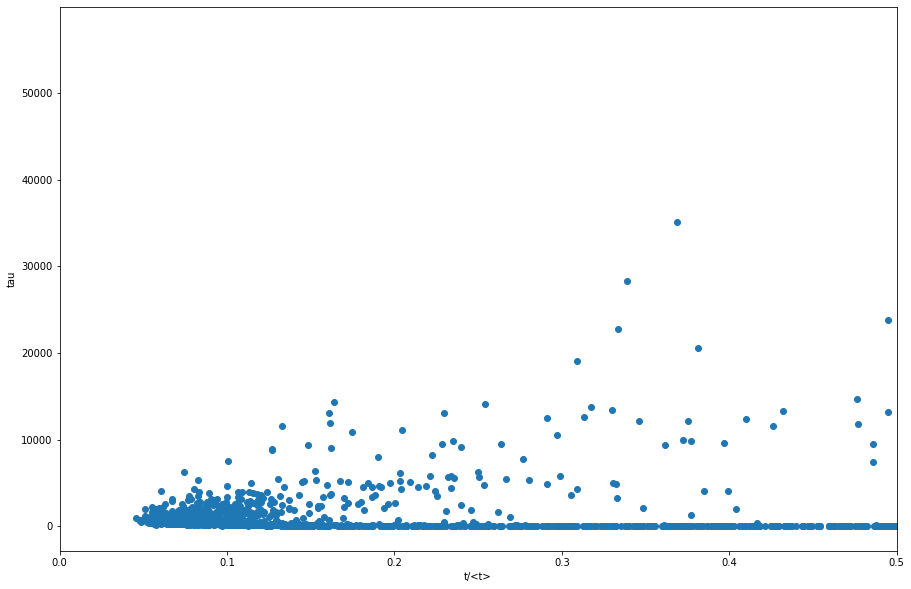

In [13]:
"""
not logged optical depth vs gamma
"""
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.set_xlabel("t/<t>")
ax.set_ylabel("tau")
ax.scatter(gamma/average,optical_depth)
ax.set_xlim(0,.5)

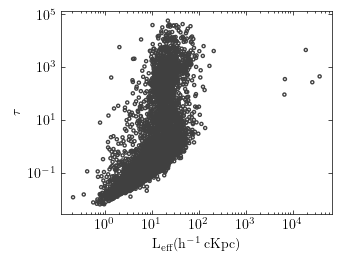

In [14]:
import matplotlib.pyplot as plt
with plt.style.context('science','notebook'):
    plt.xlabel("$\mathrm{L_{eff}(h^{-1}\:cKpc)}$",fontsize = 10)
    plt.ylabel(r"$\tau$",fontsize = 10)
    plt.xscale("log")
    plt.yscale("log")
    plt.scatter(np.multiply(np.divide(lyman_limited_value,HI),3.24078e-22/0.1453*0.68),optical_depth,s = 5,facecolors='none', edgecolors="0.25")
    plt.savefig('f4_non_uniform_80_L_eff.pdf') 

In [15]:
omega_b = 0.0479; h = 0.6814; scale = 0.1453
mean_nb = 1.123e-5/scale**3*omega_b*h**2
nb = np.multiply(gas_density_normalized,mean_nb*1.674e-24)

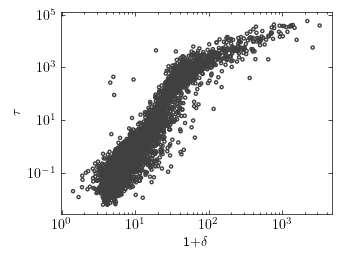

In [16]:
import matplotlib.pyplot as plt
with plt.style.context('science','notebook'):
    plt.xlabel("1+$\delta$",fontsize = 10)
    plt.ylabel(r"$\tau$",fontsize = 10)
    plt.xscale("log")
    plt.yscale("log")
    plt.scatter(np.multiply(gas_density_normalized,1.674e-24)/7.181677211452862e-28,optical_depth,s = 5,facecolors='none', edgecolors="0.25")
    plt.savefig('f4_non_uniform_80_1+delta.pdf') 